# MONTANDO O ALGORITMO DIFFERENTIAL EVOLUTION

### Definindo alguns Pacotes, Constantes, Função de Teste, Pontos e Soluções Iniciais

In [1]:
import numpy as np
import random 

n = 10
F = 0.7
Cr = 0.9

tol = 10**-5
N_iter = 0

lb = np.array([-1,-1,-1])
ub = np.array([2,2,2])
d = np.size(lb)

def Fun(u):
    z = (1-u[0])**2 + 100*(u[1] - u[0]**2)**2 + 100*(u[2] - u[1]**2)**2 
    return z

Sol = np.zeros((n,d))
Fitness = np.zeros((n,1))

for i in range(n):
    for j in range(d):
        Sol[i][j] = random.uniform(lb[j],ub[j])
    Fitness[i][0] = Fun(Sol[i,:])


In [2]:
print("Pontos Iniciais")
print(Sol)
print("\nSolucoes Iniciais")
print(Fitness)
print(f"\nMenor valor: {np.min(Fitness)}")
fmin = np.min(Fitness)
I = np.argmin(Fitness)
best = Sol[I]
print("\nMelhor Ponto Inicial:")
best

Pontos Iniciais
[[ 0.2437747   1.69264857  1.89295309]
 [ 1.04862858  0.57781535  0.90517177]
 [ 1.01165184 -0.87495817  0.78056481]
 [ 0.40379706 -0.95800757  0.07483642]
 [-0.87598359  0.75223291 -0.73584722]
 [-0.87632817  0.06425502 -0.55966856]
 [ 0.54871388  0.81048212  0.05256839]
 [-0.33061283  1.16060126 -0.06544095]
 [-0.52594436  1.03221306  1.48593965]
 [-0.52474488  0.25557171 -0.45718561]]

Solucoes Iniciais
[[361.81246771]
 [ 59.86907684]
 [360.41402662]
 [197.08806398]
 [172.98485857]
 [ 84.82615689]
 [ 62.67141333]
 [311.79055684]
 [ 77.10097056]
 [ 29.66488076]]

Menor valor: 29.66488075892575

Melhor Ponto Inicial:


array([-0.52474488,  0.25557171, -0.45718561])

### Definindo os vetores de Permutacao

O método DE escolhido foi o DE/rand/1/bin

In [3]:
k1 = np.random.permutation(n)
k1

array([4, 3, 6, 0, 1, 9, 2, 7, 8, 5])

In [4]:
k1sol = Sol[k1,:]
k1sol

array([[-0.87598359,  0.75223291, -0.73584722],
       [ 0.40379706, -0.95800757,  0.07483642],
       [ 0.54871388,  0.81048212,  0.05256839],
       [ 0.2437747 ,  1.69264857,  1.89295309],
       [ 1.04862858,  0.57781535,  0.90517177],
       [-0.52474488,  0.25557171, -0.45718561],
       [ 1.01165184, -0.87495817,  0.78056481],
       [-0.33061283,  1.16060126, -0.06544095],
       [-0.52594436,  1.03221306,  1.48593965],
       [-0.87632817,  0.06425502, -0.55966856]])

In [5]:
k2 = np.random.permutation(n)
k2

array([3, 4, 2, 9, 0, 1, 6, 8, 7, 5])

In [6]:
k2sol = Sol[k2,:]

K = np.random.rand(n,d)<Cr
K

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Definindo o vetor de Mutacao e Realizando o Cruzamento

In [7]:
# Mutacao
V = Sol + F*(k1sol-k2sol)
# Cruzamento
V = np.multiply(Sol,1-K) + np.multiply(V,K)
V

array([[-0.65207176,  2.88981691,  1.32547454],
       [ 1.94447504, -0.61935298,  1.47265032],
       [ 0.68759527,  0.30485004,  0.78056481],
       [ 0.94176077,  0.04794623,  1.71993351],
       [-0.31258587, -0.02815034, -1.42729414],
       [-1.9776896 , -0.16131553, -1.51331873],
       [ 0.87277045, -0.36932608,  0.56216588],
       [-0.19388076,  1.250473  , -1.15140737],
       [-0.66267643,  0.94234131,  2.57190608],
       [-0.52474488,  0.25557171, -0.45718561]])

In [8]:
# Obtendo a solucao do primeiro passo
for i in range(n):
    Fnew = Fun(V[i])
    if Fnew <= Fitness[i]:
        Sol[i] = V[i]
        Fitness[i] = Fnew;
        
    if Fnew<=fmin:
        best=V[i]
        fmin=Fnew

## Código completo da DE

In [10]:
import numpy as np
import random 

def fun_checkpositions(vec_pos,var_no_group,lb,ub):
  Lb = lb
  Ub = ub
  for i in range(var_no_group):
    is_below_lb = vec_pos[i] < Lb;
    is_above_ub = vec_pos[i] > Ub;
    vec_pos[i][is_below_lb] = Lb[is_below_lb]
    vec_pos[i][is_above_ub] = Ub[is_above_ub]
  return vec_pos

def myDE(Fun,n,F,Cr,lb,ub,N_max):
    N_iter = 0
    d = np.size(lb)
    Convergence_curve = np.zeros((1,N_max))
    Sol = np.zeros((n,d))
    Fitness = np.zeros((n,1))
    
    for i in range(n):
        for j in range(d):
            Sol[i][j] = random.uniform(lb[j],ub[j])
        Fitness[i][0] = Fun(Sol[i,:])

    fmin = np.min(Fitness)
    I = np.argmin(Fitness)
    best = Sol[I]

    while N_iter<N_max:
        # mutacao
        k1 = np.random.permutation(n)
        k1sol = Sol[k1,:]
        k2 = np.random.permutation(n)
        k2sol = Sol[k2,:]
        V = Sol + F*(k1sol-k2sol)
        
        # cruzamento
        K = np.random.rand(n,d)<Cr
        V = np.multiply(Sol,1-K) + np.multiply(V,K)       
        V = fun_checkpositions(V,n,lb,ub)

    ## ESSE FINAL PRECISA SER MODIFICADO
        for i in range(n):
            Fnew = Fun(V[i])
            if Fnew <= Fitness[i]:
                Sol[i] = V[i]
                Fitness[i] = Fnew;

            if Fnew<=fmin:
                best=V[i]
                fmin=Fnew
                
        Convergence_curve[0][N_iter]=fmin;
        N_iter = N_iter + 1
    return best,fmin,Convergence_curve

### TESTANDO A FUNCAO CRIADA

A equação de teste é a de Roosenbrock 3D, cujo o mínimo é no ponto [1,1,1]

$$z = (1-u_0)^2 + 100(u_1 - u_0^2)^2 + 100(u_2 - u_1^2)^2$$

Ponto Otimo: [1. 1. 1.]
Solucao Otima 4.586633089480213e-22


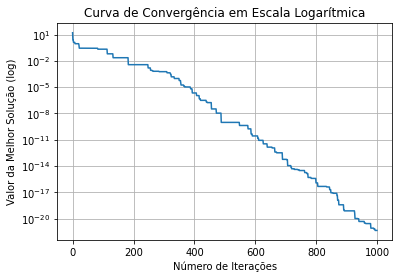

In [11]:
import matplotlib.pyplot as plt
n = 10
F = 0.7
Cr = 0.9
N_max = 1000

lb = np.array([-1,-1,-1])
ub = np.array([2,2,2])

def Fun(u):
    z = (1-u[0])**2 + 100*(u[1] - u[0]**2)**2 + 100*(u[2] - u[1]**2)**2 
    return z

best,fmin,conv_curve = myDE(Fun,n,F,Cr,lb,ub,N_max)

print(f"Ponto Otimo: {best}")
print(f"Solucao Otima {fmin}")

plt.semilogy(range(N_max), conv_curve[0])
plt.xlabel('Número de Iterações')
plt.ylabel('Valor da Melhor Solução (log)')
plt.title('Curva de Convergência em Escala Logarítmica')
plt.grid(True)
plt.show()